<a href="https://colab.research.google.com/github/ShreyJais/DL_MScAIML/blob/main/DL1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
class Perceptron:
  '''
  Variable used:
  weights
  Lrate : LEARNING RATE
  epochs  : no of ittration in traning
  bias
  error_per_epochs
  '''
  def __init__(self, alpha, epochs):
    self.weights = None
    self.alpha = alpha
    self.epochs = epochs
    self.bias = None
    self.error_per_epochs = list()

  #net input function
  def net_input(self, x): #y=mx+c
    return np.dot(self.weights, x) + self.bias

  #activation function
  def activation(self, value):
    #heaviside step function
    return np.where(value>0, 1, 0)

  def update_weights(self, x, y, y_pred):
    #calculating the error
    print("y:\t",y)
    print("y_pred:\t",y_pred)
    error = y-y_pred #loss function
    self.error_per_epochs.append(error)
    print("Error:\t",error)
    #updating the weights
    self.weights = self.weights + (self.alpha*error)*x
    self.bias = self.bias + (self.alpha*error)
    print("Updated weights:\t",self.weights)
    print("Updated bias:\t",self.bias)

   #fitting the data
  def fit(self, X, y):
    n_rows, n_cols = X.shape
    self.weights = [random.uniform(0, 1), random.uniform(0, 1)] # RANDOM WEIGHT ASSIGNMENT between 0 to 1
    self.bias = random.uniform(0, 1) # RANDOM WEIGHT ASSIGNMENT between 0 to 1
    print("Initial weights:\t",self.weights)
    print("Initial bias:\t",self.bias)

    #running a for loop for a given number of iterations
    for epoch in range(self.epochs):
    #going through the data one row at a time
      print("\nEpochs :\t",epoch)
      for i, x in enumerate(X):
        print("\nX:",x)
        #calculating the net output
        output = self.net_input(x)
        #activating the output
        activated_output = self.activation(output)
        #updating the weights
        self.update_weights(x, y[i], activated_output)

    #predicted new values
    def predict(self, x):
        output = self.activation(self.net_input(x))
        return output


#AND

In [18]:
#creating data for AND gate
AND = pd.DataFrame([[0,0,0],
                  [0,1,0],
                  [1,0,0],
                  [1,1,1]], columns=['x1', 'x2', 'y'])

AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [19]:
#applying the perceptron
perceptron = Perceptron(alpha=0.01, epochs=100)
perceptron.fit(AND.drop('y', axis=1).values, AND['y'])

Initial weights:	 [0.11697519474632656, 0.7230898348602091]
Initial bias:	 0.30865759773153734

Epochs :	 0

X: [0 0]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.11697519 0.72308983]
Updated bias:	 0.2986575977315373

X: [0 1]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.11697519 0.71308983]
Updated bias:	 0.2886575977315373

X: [1 0]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.10697519 0.71308983]
Updated bias:	 0.2786575977315373

X: [1 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.10697519 0.71308983]
Updated bias:	 0.2786575977315373

Epochs :	 1

X: [0 0]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.10697519 0.71308983]
Updated bias:	 0.2686575977315373

X: [0 1]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.10697519 0.70308983]
Updated bias:	 0.2586575977315373

X: [1 0]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.09697519 0.70308983]
Updated bias:	 0.24865759773153728

X: [1 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.09697519 0.70308983]
Up

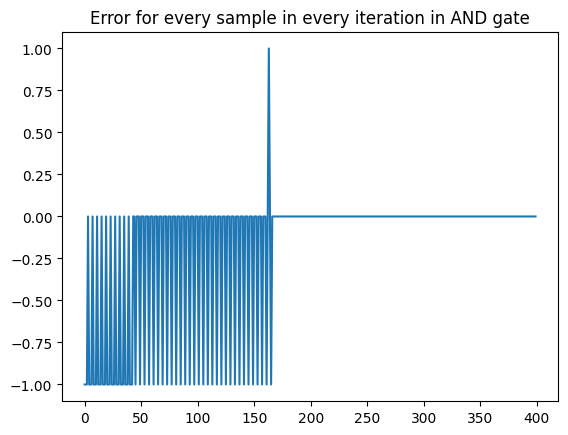

In [20]:
plt.plot(perceptron.error_per_epochs)
plt.title("Error for every sample in every iteration in AND gate")
plt.show()

#OR

In [21]:
#creating data for OR gate
OR = pd.DataFrame([[0,0,0],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]], columns=['x1', 'x2', 'y'])

OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [22]:
#applying the perceptron
perceptron = Perceptron(alpha=0.01, epochs=100)
perceptron.fit(OR.drop('y', axis=1).values, OR['y'])

Initial weights:	 [0.8743811683295426, 0.6686153767350861]
Initial bias:	 0.4900842720951758

Epochs :	 0

X: [0 0]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.87438117 0.66861538]
Updated bias:	 0.4800842720951758

X: [0 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.87438117 0.66861538]
Updated bias:	 0.4800842720951758

X: [1 0]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.87438117 0.66861538]
Updated bias:	 0.4800842720951758

X: [1 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.87438117 0.66861538]
Updated bias:	 0.4800842720951758

Epochs :	 1

X: [0 0]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.87438117 0.66861538]
Updated bias:	 0.4700842720951758

X: [0 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.87438117 0.66861538]
Updated bias:	 0.4700842720951758

X: [1 0]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.87438117 0.66861538]
Updated bias:	 0.4700842720951758

X: [1 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.87438117 0.66861538]
Updated b

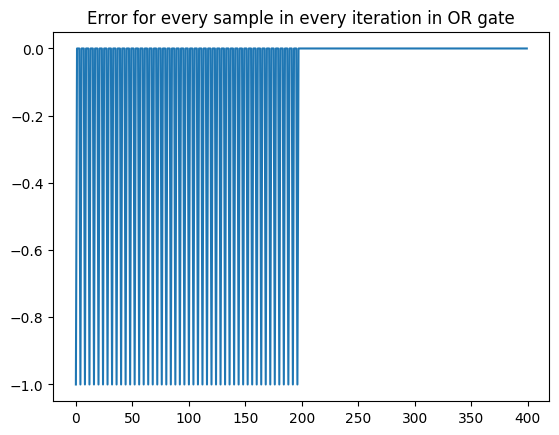

In [23]:
plt.plot(perceptron.error_per_epochs)
plt.title("Error for every sample in every iteration in OR gate")
plt.show()

#NAND

In [24]:
#creating data for NAND gate
NAND = pd.DataFrame([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,0]], columns=['x1', 'x2', 'y'])

NAND

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


In [25]:
perceptron = Perceptron(alpha=0.01, epochs=100)
perceptron.fit(NAND.drop('y', axis=1).values, NAND['y'])

Initial weights:	 [0.7571969731199888, 0.3453914890424903]
Initial bias:	 0.25247735988175346

Epochs :	 0

X: [0 0]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.75719697 0.34539149]
Updated bias:	 0.25247735988175346

X: [0 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.75719697 0.34539149]
Updated bias:	 0.25247735988175346

X: [1 0]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.75719697 0.34539149]
Updated bias:	 0.25247735988175346

X: [1 1]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.74719697 0.33539149]
Updated bias:	 0.24247735988175345

Epochs :	 1

X: [0 0]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.74719697 0.33539149]
Updated bias:	 0.24247735988175345

X: [0 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.74719697 0.33539149]
Updated bias:	 0.24247735988175345

X: [1 0]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.74719697 0.33539149]
Updated bias:	 0.24247735988175345

X: [1 1]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.73719697 0.32539149]
U

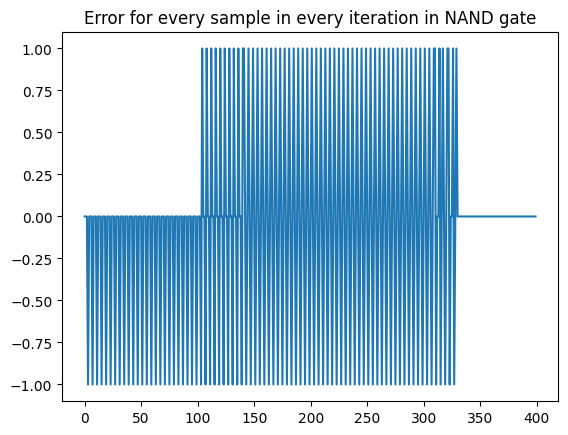

In [26]:
plt.plot(perceptron.error_per_epochs)
plt.title("Error for every sample in every iteration in NAND gate")
plt.show()

#XOR

In [27]:
#creating data for XOR gate
XOR = pd.DataFrame([[0,0,0],
                  [0,1,1],
                  [1,0,1],
                  [1,1,0]], columns=['x1', 'x2', 'y'])

XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [28]:
perceptron = Perceptron(alpha=0.01, epochs=100)
perceptron.fit(XOR.drop('y', axis=1).values, XOR['y'])

Initial weights:	 [0.6317359547123453, 0.1277333332997418]
Initial bias:	 0.828421840373171

Epochs :	 0

X: [0 0]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.63173595 0.12773333]
Updated bias:	 0.818421840373171

X: [0 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.63173595 0.12773333]
Updated bias:	 0.818421840373171

X: [1 0]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.63173595 0.12773333]
Updated bias:	 0.818421840373171

X: [1 1]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.62173595 0.11773333]
Updated bias:	 0.808421840373171

Epochs :	 1

X: [0 0]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.62173595 0.11773333]
Updated bias:	 0.798421840373171

X: [0 1]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.62173595 0.11773333]
Updated bias:	 0.798421840373171

X: [1 0]
y:	 1
y_pred:	 1
Error:	 0
Updated weights:	 [0.62173595 0.11773333]
Updated bias:	 0.798421840373171

X: [1 1]
y:	 0
y_pred:	 1
Error:	 -1
Updated weights:	 [0.61173595 0.10773333]
Updated bias:	 

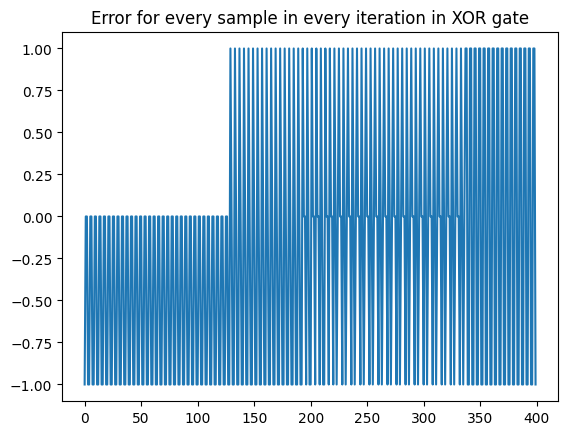

In [29]:
plt.plot(perceptron.error_per_epochs)
plt.title("Error for every sample in every iteration in XOR gate")
plt.show()

The perceptron failed to learn XOR gate

#Gradient Descent Algorithm

In [30]:
import numpy as np
p = np.poly1d([1, -2, 2])
print("f(x):\n", p)
dp = p.deriv()
print("f(x)'=", dp)

f(x):
    2
1 x - 2 x + 2
f(x)'=  
2 x - 2


In [31]:
x=100
descent=[]
while dp(x)>0.02:
    descent.append(x)
    x-=(0.1 * dp(x))
print(descent)

[100, 80.2, 64.36, 51.688, 41.5504, 33.44032, 26.952256, 21.7618048, 17.60944384, 14.287555072, 11.6300440576, 9.504035246079999, 7.803228196864, 6.4425825574912, 5.35406604599296, 4.483252836794368, 3.7866022694354946, 3.2292818155483958, 2.7834254524387165, 2.4267403619509733, 2.1413922895607787, 1.913113831648623, 1.7304910653188983, 1.5843928522551187, 1.467514281804095, 1.374011425443276, 1.2992091403546209, 1.2393673122836968, 1.1914938498269574, 1.153195079861566, 1.1225560638892529, 1.0980448511114023, 1.078435880889122, 1.0627487047112976, 1.050198963769038, 1.0401591710152305, 1.0321273368121844, 1.0257018694497475, 1.020561495559798, 1.0164491964478384, 1.0131593571582707, 1.0105274857266164]


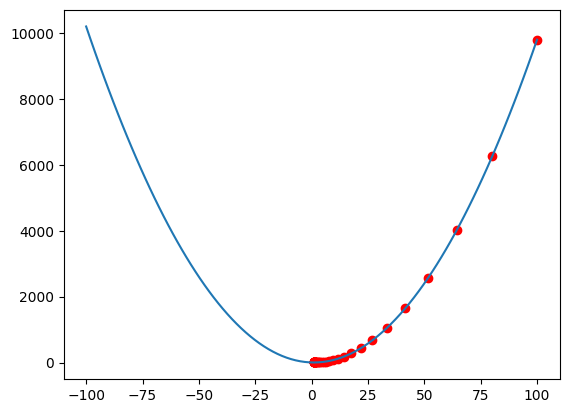

In [32]:
import matplotlib.pyplot as plt

y = p(descent) #sol poly
x_data = np.linspace(-100, 100, 100)
y_data = p(x_data)
plt.plot(x_data, y_data)
plt.scatter(descent, y, c='r')
plt.show()

In [35]:
from sympy import *
x, y = symbols('x y')
f = (1 - x)**2 + 100*(y - x**2)**2
f_x = diff(f, x)
f_y = diff(f, y)
print("function f():\t",f)
print("partial derivative of f wrt x:\t",f_x)
print("partial derivative of f wrt y:\t",f_y)
grad = lambdify((x, y), derive_by_array(f, (x, y)))

function f():	 (1 - x)**2 + 100*(-x**2 + y)**2
partial derivative of f wrt x:	 -400*x*(-x**2 + y) + 2*x - 2
partial derivative of f wrt y:	 -200*x**2 + 200*y


In [37]:
x=2
y=2
x_descent=[]
y_descent=[]

In [38]:
while np.linalg.norm(grad(x,y))>0.02:
    x_descent.append(x)
    y_descent.append(y)
    x-=0.001*grad(x,y)[0]
    y-=0.001*grad(x,y)[1]
    print("updated values: \n","x:\t",x,"y:\t",y)

Streaming output truncated to the last 5000 lines.
updated values: 
 x:	 1.0691745865501645 y:	 1.1433884547200508
updated values: 
 x:	 1.0691449331704306 y:	 1.1433249414008415
updated values: 
 x:	 1.069115291213564 y:	 1.1432614543020059
updated values: 
 x:	 1.0690856606761925 y:	 1.1431979934142948
updated values: 
 x:	 1.069056041554945 y:	 1.1431345587284616
updated values: 
 x:	 1.06902643384645 y:	 1.1430711502352608
updated values: 
 x:	 1.068996837547336 y:	 1.1430077679254498
updated values: 
 x:	 1.0689672526542324 y:	 1.1429444117897873
updated values: 
 x:	 1.0689376791637686 y:	 1.1428810818190347
updated values: 
 x:	 1.0689081170725736 y:	 1.1428177780039548
updated values: 
 x:	 1.0688785663772775 y:	 1.1427545003353126
updated values: 
 x:	 1.06884902707451 y:	 1.1426912488038754
updated values: 
 x:	 1.0688194991609012 y:	 1.1426280234004123
updated values: 
 x:	 1.0687899826330813 y:	 1.1425648241156943
updated values: 
 x:	 1.068760477487681 y:	 1.14250165094049